<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [10]:

np.random.normal(loc=5, scale=2, size=10)

array([3.52175969, 6.03110736, 7.95425657, 5.26631631, 3.00130274,
       2.19673913, 5.79586411, 4.18450022, 6.93881277, 6.55354772])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

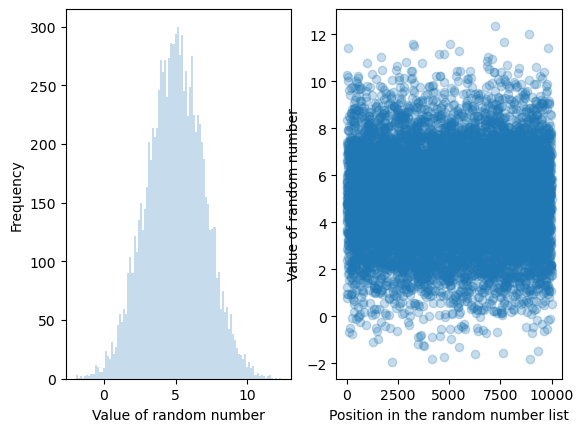

In [11]:

n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [13]:

n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 67.90%


## 1 Brownian Motion in 1D

### 1.1 The scenario

In [ ]:

#p = probability of step to right
#q = (1-p) = probability of step to left

### 1.2 The simulation

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

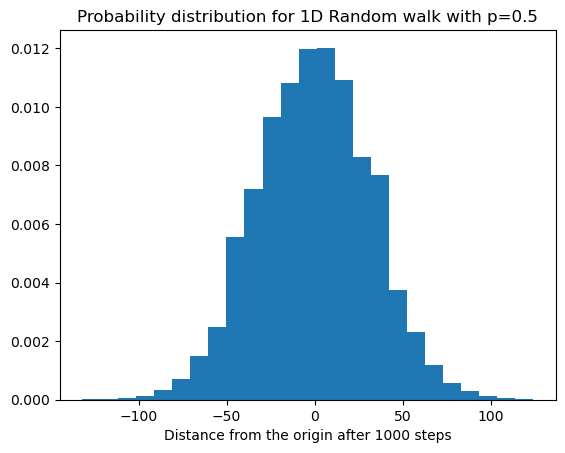

In [18]:

def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x
import numpy.random as rnd

no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')



### 1.3 What does theory say?

## 2 Estimating \(\pi\)

### 2.1 The method

In [20]:

N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    
    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

3.13868

### 2.2 A poor but intuitive solution

In [21]:

N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)

3.141448

### 2.3 A better solution

In [ ]:

# Your code here


### 2.4 A smarter solution

In [ ]:

# Your code here


## Exercise 1 :  Vital Stats of Random π

In [8]:
from matplotlib import pyplot as plt

In [4]:
def estimate_pi(n):
    
    x=rnd.rand(n)
    y=rnd.rand(n)
    N_green=np.sum((x**2+y**2) <= 1)
    return 4* (N_green / n)


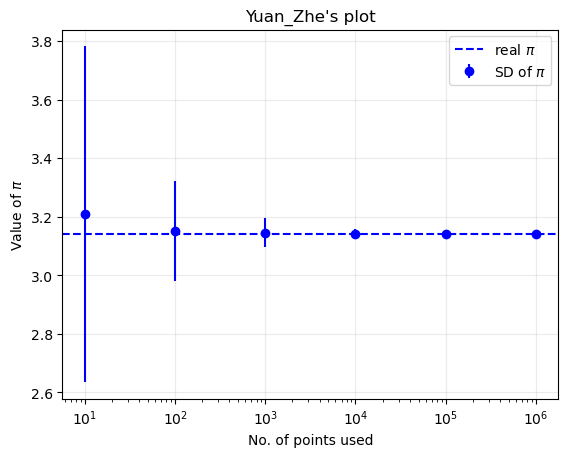

In [9]:

mean = []
sd = []
for n in (10,100,1000,10000,100000,1000000):
    estimate_pi(n)
    result = [estimate_pi(n) for _ in range(100)]
    mean.append(np.mean(result))
    sd.append(np.std(result))

x = (10,100,1000,10000,100000,1000000)
y = mean
y_error = sd

plt.axhline(y=np.pi, color = 'blue', linestyle = '--', label = 'real $\pi$')
plt.errorbar(x, y, yerr=y_error, color = 'blue', fmt= 'o', label = 'SD of $\pi$')
plt.xscale('log')
plt.xlabel('No. of points used')
plt.ylabel('Value of $\pi$')
plt.title('Yuan_Zhe\'s plot')
plt.grid(alpha=.25)
plt.legend(loc='upper right')
plt.show()